Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory
$y = Ax$

we observe a $m$ linear projection of $x \in \mathbb{R}^d$ through a sensing matrix $A \in \mathbb{R}^{m,d}$

We want to rebuild $x$. This is an under-dermined problem. First approach, we can minimize on $||.||_2$:

$\min_{z \in \mathbb{R}^d} ||z||_2$ st $y = Az$

The optimality solution for this convex problem is given by (kkt):

$\nabla L(z,\lambda) = 0$ $\rightarrow$ $z = A^T (AA^T)^{-1}y$ (Pseudoinverse)



# Example

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import pylab as pyl

In [26]:
def mse(x_true, x_pred):
    return np.sqrt(((x_true - x_pred)**2).sum())

In [539]:
def sparse_signal_random_sensing_pseudo_invers(n,s,prop):

    x = np.zeros(n)
    x[np.random.permutation(n)[:s]] = np.random.randn(s) * 10
    
    #sensing matrix size
    m = int(np.round(prop*n))
    
    # Sensing matrix random
    A_rand = np.random.randn(m,n) * 10
    # observed y
    y_rand = A_rand.dot(x)
    
    x_L2_rand = A_rand.T.dot(np.linalg.solve(A_rand.dot(A_rand.T),y_rand)) #pseudo inverse
    return mse(x, x_L2_rand)

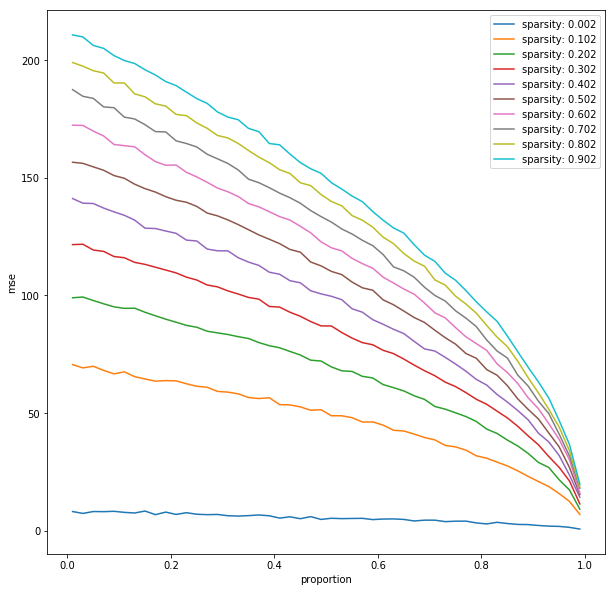

In [562]:
n = 500
fig, ax = plt.subplots(figsize=(10,10))

for parse in np.arange(1,n,50):
    props = np.linspace(0.01,0.99)
    mean_res = np.zeros(len(props))
    
    res = np.zeros(100)
    for _,prop in enumerate(props):
        for i in range(100):
            res[i] = sparse_signal_random_sensing_pseudo_invers(n,parse,prop)
        mean_res[_] = res.mean()
    ax.plot(props, mean_res,label="sparsity: %.3f" % (parse/n))
ax.set_xlabel("proportion")
ax.set_ylabel("mse")
ax.legend()